## [Step1] 서버통신 이해하기
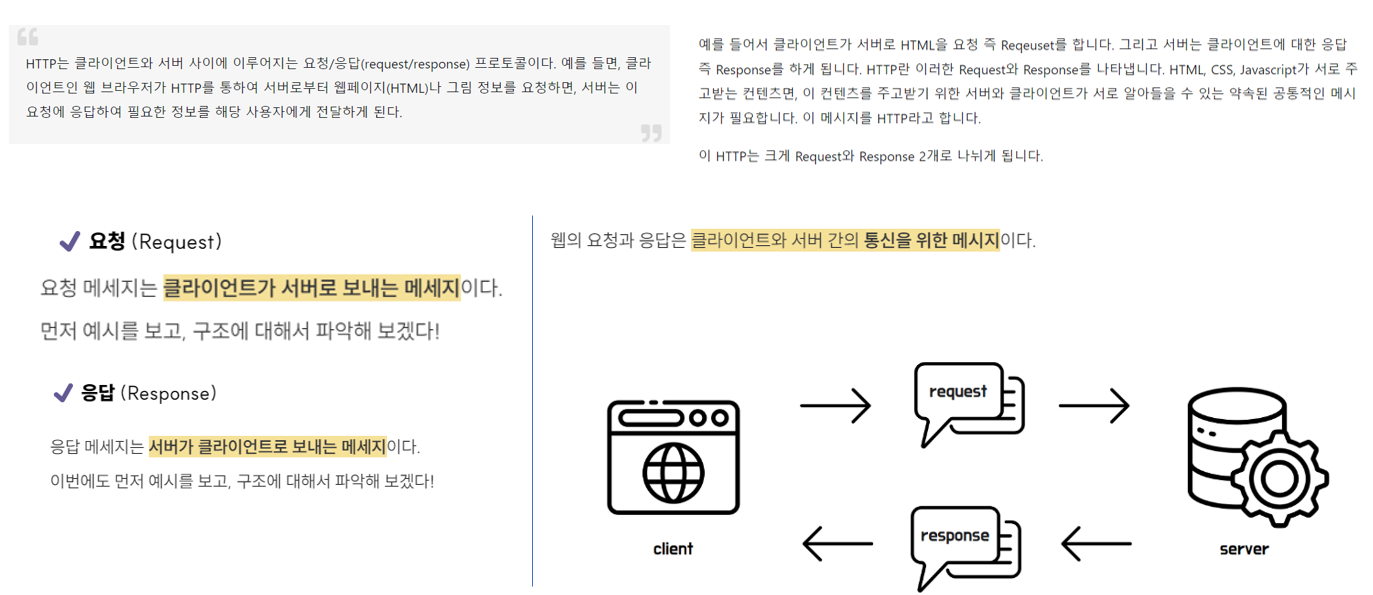
- 아래 사이트 간단히만 읽어주세요
    - https://velog.io/@bky373/Web-HTTP%EC%99%80-HTTPS-%EC%B4%88%EA%B0%84%EB%8B%A8-%EC%A0%95%EB%A6%AC
    - https://jangjjolkit.tistory.com/12

## [step2] request 모듈 및 실습
- requests 라이브러리란? 
    - 파이썬에서 HTTP 요청을 보내는 가장 간편하고 직관적인 방법임
    - 장점
        - 간편한 사용법: requests는 사용하기 쉬운 API를 제공하여 누구나 쉽게 HTTP 요청을 보낼 수 있습니다.
        - 다양한 기능: requests는 다양한 HTTP 메서드(GET, POST, PUT, DELETE 등)를 지원하며, 세션 관리, 쿠키 처리, 인증 등 다양한 기능을 제공합니다.
        - 인기와 지속적인 업데이트: requests는 파이썬에서 가장 많이 사용되는 HTTP 라이브러리로, 많은 사용자들이 활발하게 사용하고 있으며, 지속적으로 업데이트가 이루어지고 있습니다.
    - 단점:
        - 성능: requests는 파이썬의 GIL(Global Interpreter Lock)로 인해 멀티스레드 환경에서 성능이 저하될 수 있습니다.
        - 속도: requests는 내부적으로 urllib3를 사용하여 HTTP 요청을 처리하는데, 이는 기본적으로 C로 구현되어 있어 속도가 빠릅니다. 하지만, 비동기적인 요청을 처리하는 라이브러리들과 비교하면 상대적으로 느릴 수 있습니다.

- 헤더 구조에 대해 간단히만 읽기 (response.request.headers 명령어로 헤더정보를 가져올수 있음음)
    - https://engineerinsight.tistory.com/47
    - 헤더정보가 어디에 사용되는지: https://velog.io/@jkijki12/HTTP-Header-%EC%A0%95%EB%A6%AC
    
 

- request 모듈에 대해 자세히
    - https://me2nuk.com/Python-requests-module-example/

In [45]:
##############################################
###  [실습] 아래 사이트의 내용을 실습하여 봅니다.
###         [실습목적: request 모듈 사용예]
###  https://cucucacadev.tistory.com/6
##############################################
import requests
url='https://www.google.com/search'
param={"q":"python"}
response=requests.get(url, params=param)
response.text

response.request.path_url
response.request.method
response.request.headers


{'User-Agent': 'python-requests/2.31.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

## [step3] find, select를 이용한 크롤링
- [실습목적: 크롬개발자 도구 항목 이해 ] - 기본 크롤링, 테이블 좀더 쉽게 크롤링 
- https://m.blog.naver.com/passionisall/222074573424  ---> 2. network에서 헤더값을 가져와 함께 요청하기

    - element: HTML 요소 이름에 해당합니다.
    - #id: 특정 ID를 가진 요소를 선택합니다.
    - .class: 특정 클래스를 가진 요소를 선택합니다.



In [46]:
###################################
## 각 명령어의 차이를 이해합니다.
####################################
import requests

# 해당 페이지 모든 정보 가져옴
import requests
from bs4 import BeautifulSoup

url = "https://www.google.com/search?q=삼성전자"

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'}

r = requests.get(url,headers=headers)

soup = BeautifulSoup(r.content,'lxml') # soup = BeautifulSoup(r.content,'html.parser')

div = soup.find('div',id='result-stats')
div = soup.find('div',{'id':'result-stats'})
div = soup.find('div',attrs={'id':'result-stats'})

print(div);print('-'*100)
print(div.text);print('-'*100)

div = soup.select('div#result-stats')

print(div);print('-'*100)
print(div[0]);print('-'*100)
print(div[0].text)

<div id="result-stats">검색결과 약 54,300,000개<nobr> (0.41초) </nobr></div>
----------------------------------------------------------------------------------------------------
검색결과 약 54,300,000개 (0.41초) 
----------------------------------------------------------------------------------------------------
[<div id="result-stats">검색결과 약 54,300,000개<nobr> (0.41초) </nobr></div>]
----------------------------------------------------------------------------------------------------
<div id="result-stats">검색결과 약 54,300,000개<nobr> (0.41초) </nobr></div>
----------------------------------------------------------------------------------------------------
검색결과 약 54,300,000개 (0.41초) 


### [step4] select 문법 추가하기
- https://www.fun-coding.org/post/crawl_basic4.html#gsc.tab=0
- 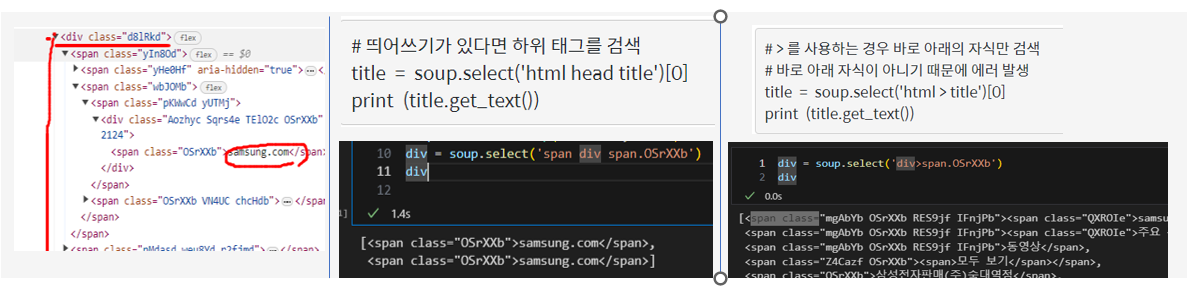


In [47]:
import requests

# 해당 페이지 모든 정보 가져옴
import requests
from bs4 import BeautifulSoup

url = "https://www.google.com/search?q=삼성전자"
r = requests.get(url,headers=headers)
soup = BeautifulSoup(r.content,'lxml') # soup = BeautifulSoup(r.content,'html.parser')
div = soup.select('span div span.OSrXXb')
div


[<span class="OSrXXb">samsung.com</span>,
 <span class="OSrXXb">samsung.com</span>]

In [48]:
div = soup.select('div>span.OSrXXb')
div

[<span class="OSrXXb">samsung.com</span>,
 <span class="OSrXXb">samsung.com</span>,
 <span class="mgAbYb OSrXXb RES9jf IFnjPb"><span class="QXROIe">samsung.com의 최신 뉴스</span></span>,
 <span class="mgAbYb OSrXXb RES9jf IFnjPb"><span class="QXROIe">주요 뉴스</span></span>,
 <span class="mgAbYb OSrXXb RES9jf IFnjPb">동영상</span>,
 <span class="Z4Cazf OSrXXb"><span>모두 보기</span></span>,
 <span class="OSrXXb">삼성전자판매(주)이마트창동점</span>,
 <span class="OSrXXb">삼성전자서비스 도봉센터</span>,
 <span class="OSrXXb">삼성전자판매(주)쌍문점</span>,
 <span class="mgAbYb OSrXXb RES9jf IFnjPb">추가 검색어</span>]

－ 하위태그 가져오기
－ - https://www.fun-coding.org/post/crawl_basic4.html#gsc.tab=0
－ 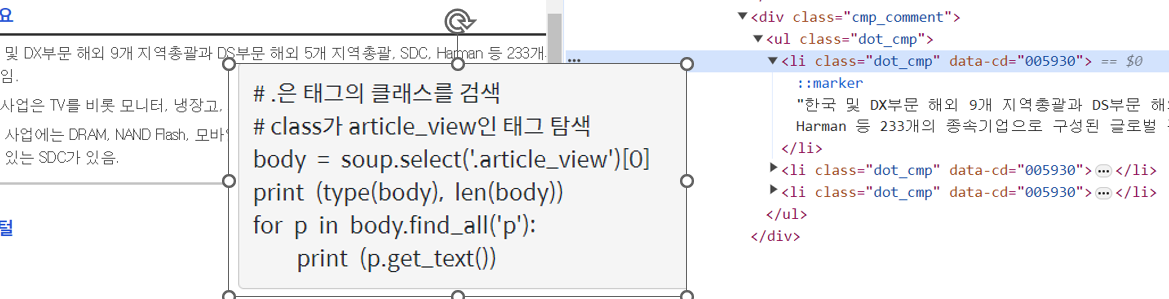

In [49]:
###############################################
# 블로그 내용임
# 3. 네이버 삼성전자 증시 페이지 크롤링
# https://m.blog.naver.com/passionisall/222074573424
###################################################
from bs4 import BeautifulSoup
url = 'http://companyinfo.stock.naver.com/v1/company/c1010001.aspx?cmp_cd=005930'
r = requests.get(url)
soup = BeautifulSoup(r.text,"lxml")
div=soup.find_all('li', class_='dot_cmp')
div=soup.select('li.dot_cmp')

div=soup.select('div.cmp_comment ul.dot_cmp li.dot_cmp')
div=soup.select('div.cmp_comment')[0]
print(div)



<div class="cmp_comment">
<ul class="dot_cmp">
<li class="dot_cmp" data-cd="005930">한국 및 DX부문 해외 9개 지역총괄과 DS부문 해외 5개 지역총괄, SDC, Harman 등 233개의 종속기업으로 구성된 글로벌 전자기업임.</li>
<li class="dot_cmp" data-cd="005930">세트사업은 TV를 비롯 모니터, 냉장고, 세탁기, 에어컨, 스마트폰, 네트워크시스템, 컴퓨터 등을 생산하는 DX부문이 있음.</li>
<li class="dot_cmp" data-cd="005930">부품 사업에는 DRAM, NAND Flash, 모바일AP 등의 제품을 생산하고 있는 DS 부문과 중소형OLED 등의 디스플레이 패널을 생산하고 있는 SDC가 있음.</li>
</ul>
</div>


In [50]:
div.find_all('li')

[<li class="dot_cmp" data-cd="005930">한국 및 DX부문 해외 9개 지역총괄과 DS부문 해외 5개 지역총괄, SDC, Harman 등 233개의 종속기업으로 구성된 글로벌 전자기업임.</li>,
 <li class="dot_cmp" data-cd="005930">세트사업은 TV를 비롯 모니터, 냉장고, 세탁기, 에어컨, 스마트폰, 네트워크시스템, 컴퓨터 등을 생산하는 DX부문이 있음.</li>,
 <li class="dot_cmp" data-cd="005930">부품 사업에는 DRAM, NAND Flash, 모바일AP 등의 제품을 생산하고 있는 DS 부문과 중소형OLED 등의 디스플레이 패널을 생산하고 있는 SDC가 있음.</li>]

In [51]:
for x in div.find_all('li'):
    print(x['data-cd'])

005930
005930
005930


### [step５] 표테이블 쉽게 가져오기
－ 표테이블의 내용은 테이블 table, 행제목 또는 열제목의 th, 행tr, 열 td의 각 항목을 크롤링 해야하나
- read.html 기능을 이용하여 쉽게 표의 형태로 데이터프레임화 할수 있음.
- html_table_parser 기능을 이용할수도 있지만 bs4 버전과 충돌 있을수도 있음.

In [52]:
###########################
## 기본적인 크롤링을 먼저 실행하여서 연간매출액
########
import pandas as pd
url = 'http://companyinfo.stock.naver.com/v1/company/c1010001.aspx?cmp_cd=005930'
r = requests.get(url)
soup = BeautifulSoup(r.text,"lxml")
df_list = pd.read_html(url, encoding='euc-kr')
df_list # 이기능은 표를 번호대로 갖고오는 기능임. (표1,표2,표3)

[                                                   0
 0  삼성전자  005930  SamsungElec  KOSPI : 전기전자  WICS ...
 1  EPS 4,704  BPS 52,068  PER 15.24  업종PER 28.85 ...,
                    0                                1
 0        주가/전일대비/수익률        71,700원 /  +700원 / +0.99%
 1      52Weeks 최고/최저               79,800원 /  59,000원
 2                액면가                             100원
 3           거래량/거래대금          17,853,400주 /  12,743억원
 4               시가총액                      4,280,334억원
 5              52주베타                             1.00
 6         발행주식수/유동비율          5,969,782,550주 / 76.53%
 7             외국인지분율                           54.18%
 8  수익률 (1M/3M/6M/1Y)  -1.65%/ +1.70%/ -0.42%/ +18.71%,
    신용등급  BOND  CP
 0   KIS   NaN NaN
 1    KR   NaN NaN
 2  NICE   NaN NaN
 3   NaN   NaN NaN,
                   0
 0  [기준: 2024.01.18],
                                                 주요주주     보유주식수(보통)  보유지분(%)
 0                          삼성생명보험 외 15인 삼성생명보험 외 15인  1.205765e+09   

In [53]:
len(df_list) # 15개의 표가 있음을 뜻함

15

In [54]:
df_list[0]

,0
0,삼성전자 005930 SamsungElec KOSPI : 전기전자 WICS ...
1,"EPS 4,704 BPS 52,068 PER 15.24 업종PER 28.85 ..."


In [55]:
for cnt, x in enumerate(df_list):
    print('\n▶'+str(cnt) + 'bun--------->')
    display(x)


▶0bun--------->


,0
0,삼성전자 005930 SamsungElec KOSPI : 전기전자 WICS ...
1,"EPS 4,704 BPS 52,068 PER 15.24 업종PER 28.85 ..."



▶1bun--------->


,0,1
0,주가/전일대비/수익률,"71,700원 / +700원 / +0.99%"
1,52Weeks 최고/최저,"79,800원 / 59,000원"
2,액면가,100원
3,거래량/거래대금,"17,853,400주 / 12,743억원"
4,시가총액,"4,280,334억원"
5,52주베타,1.00
6,발행주식수/유동비율,"5,969,782,550주 / 76.53%"
7,외국인지분율,54.18%
8,수익률 (1M/3M/6M/1Y),-1.65%/ +1.70%/ -0.42%/ +18.71%



▶2bun--------->


,신용등급,BOND,CP
0,KIS,NaN,NaN
1,KR,NaN,NaN
2,NICE,NaN,NaN
3,NaN,NaN,NaN



▶3bun--------->


,0
0,[기준: 2024.01.18]



▶4bun--------->


,주요주주,보유주식수(보통),보유지분(%)
0,삼성생명보험 외 15인 삼성생명보험 외 15인,1.205765e+09,20.20
1,국민연금공단,4.586377e+08,7.68
2,BlackRock Fund Advisors 외 15인 BlackRock Fund A...,3.003911e+08,5.03
3,NaN,NaN,NaN



▶5bun--------->


,주요지표,2022/12(A),2023/12(E)
0,PER,8.90,46.05
1,PBR,1.41,1.48
2,PCR,7.83,9.88
3,EV/EBITDA,4.50,8.81
4,EPS,"8,057원","1,663원"
5,BPS,"50,817원","51,768원"
6,EBITDA,"824,842.9억원","473,441.0억원"
7,현금DPS,"1,444원","1,508원"
8,현금배당수익률,2.01%,1.97%
9,회계기준,연결,연결



▶6bun--------->


,"어닝서프라이즈 * 단위: 억원, %","어닝서프라이즈 * 단위: 억원, %.1","어닝서프라이즈 * 단위: 억원, %.2","어닝서프라이즈 * 단위: 억원, %.3"



▶7bun--------->


,0,1
0,밴드차트,밴드차트 주재무제표 K-IFRS(별도) K-IFRS(연결) K-GAAP(개별...



▶8bun--------->


,0,1,2
0,Financial Summary,주재무제표 K-IFRS(별도) K-IFRS(연결) K-GAAP(개별) K-G...,"* 단위 : 억원, %, 배, 주 * 분기: 순액기준"



▶9bun--------->


,항목명,상세기준
0,CAPEX,유형자산의증가
1,FCF,영업활동으로인한현금흐름-CAPEX
2,이자발생부채,단기사채+단기차입금+유동성장기부채+단기금융부채+사채+장기차입금+장기금융부채
3,영업이익률,영업이익/매출액(수익)
4,순이익률,당기순이익/매출액(수익)
5,ROE,(지배주주지분)당기순이익[당기]/((지배주주지분)자본총계[당기]+(지배주주지분)자본...
6,ROA,당기순이익[당기]/(자산총계[당기]+자산총계[전기]/2)
7,부채비율,부채총계/자본총계
8,자본유보율,(자본잉여금+이익잉여금)/자본금
9,EPS,(지배주주지분)당기순이익*1000/수정평균발행주식수(보통주+우선주)



▶10bun--------->


,0,1,2,3,4,5
0,NaN,전체,연간,분기,NaN,NaN



▶11bun--------->


,0,1,2,3,4,5
0,4.0,투자의견,목표주가(원),EPS(원),PER(배),추정기관수
1,4.0,4.00,94217,4535,15.81,23



▶12bun--------->


,제공처,최종일자,목표가,직전목표가,변동률(%),투자의견,직전투자의견
0,KB,24/01/18,95000,95000,0.00,BUY,BUY
1,DB금융투자,24/01/16,94000,94000,0.00,Buy,Buy
2,한화투자,24/01/16,94000,94000,0.00,Buy,Buy
3,현대차,24/01/16,89000,89000,0.00,BUY,BUY
4,IBK투자,24/01/16,90000,90000,0.00,매수,매수
5,메리츠,24/01/15,95000,95000,0.00,Buy,Buy
6,하이투자,24/01/10,87000,83000,4.82,Buy,Buy
7,NH투자,24/01/10,95000,95000,0.00,Buy,Buy
8,한국투자,24/01/10,99000,99000,0.00,매수,매수
9,흥국,24/01/10,93000,93000,0.00,BUY,BUY



▶13bun--------->


,0,1
0,추정실적 컨센서스,주재무제표 K-IFRS(별도) K-IFRS(연결) K-GAAP(개별) K-G...



▶14bun--------->


,0,1,2,3,4
0,NaN,연간,분기,NaN,NaN


In [56]:
df_list[1]

,0,1
0,주가/전일대비/수익률,"71,700원 / +700원 / +0.99%"
1,52Weeks 최고/최저,"79,800원 / 59,000원"
2,액면가,100원
3,거래량/거래대금,"17,853,400주 / 12,743억원"
4,시가총액,"4,280,334억원"
5,52주베타,1.00
6,발행주식수/유동비율,"5,969,782,550주 / 76.53%"
7,외국인지분율,54.18%
8,수익률 (1M/3M/6M/1Y),-1.65%/ +1.70%/ -0.42%/ +18.71%


In [57]:
df_list[2]

,신용등급,BOND,CP
0,KIS,NaN,NaN
1,KR,NaN,NaN
2,NICE,NaN,NaN
3,NaN,NaN,NaN


In [58]:
df_list[3]

,0
0,[기준: 2024.01.18]


In [59]:
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2 non-null      object
dtypes: object(1)
memory usage: 148.0+ bytes


In [60]:
for cnt,x in enumerate(df_list):
    print('num:{}/ columns=>>{}'.format(cnt, x.columns))

num:0/ columns=>>Index([0], dtype='int64')
num:1/ columns=>>Index([0, 1], dtype='int64')
num:2/ columns=>>Index(['신용등급', 'BOND', 'CP'], dtype='object')
num:3/ columns=>>Index([0], dtype='int64')
num:4/ columns=>>Index(['주요주주', '보유주식수(보통)', '보유지분(%)'], dtype='object')
num:5/ columns=>>Index(['주요지표', '2022/12(A)', '2023/12(E)'], dtype='object')
num:6/ columns=>>Index(['어닝서프라이즈  * 단위: 억원, %', '어닝서프라이즈  * 단위: 억원, %.1',
       '어닝서프라이즈  * 단위: 억원, %.2', '어닝서프라이즈  * 단위: 억원, %.3'],
      dtype='object')
num:7/ columns=>>Index([0, 1], dtype='int64')
num:8/ columns=>>Index([0, 1, 2], dtype='int64')
num:9/ columns=>>Index(['항목명', '상세기준'], dtype='object')
num:10/ columns=>>Index([0, 1, 2, 3, 4, 5], dtype='int64')
num:11/ columns=>>Index([0, 1, 2, 3, 4, 5], dtype='int64')
num:12/ columns=>>Index(['제공처', '최종일자', '목표가', '직전목표가', '변동률(%)', '투자의견', '직전투자의견'], dtype='object')
num:13/ columns=>>Index([0, 1], dtype='int64')
num:14/ columns=>>Index([0, 1, 2, 3, 4], dtype='int64')


In [61]:
#### 어떤 데이터프레임에 '현금DPS'가 있는지 확인하고자 한다면
#### 중복된 값이 없다는 전제하에 break 함


chk=0
for cnt,df in enumerate(df_list):
    if '주요지표' in df.columns:
        print('{} 번 데이터 프레임'.format(cnt))
        chk=1
        break
if chk==0:
    print('not find')

df_list[cnt]


5 번 데이터 프레임


,주요지표,2022/12(A),2023/12(E)
0,PER,8.90,46.05
1,PBR,1.41,1.48
2,PCR,7.83,9.88
3,EV/EBITDA,4.50,8.81
4,EPS,"8,057원","1,663원"
5,BPS,"50,817원","51,768원"
6,EBITDA,"824,842.9억원","473,441.0억원"
7,현금DPS,"1,444원","1,508원"
8,현금배당수익률,2.01%,1.97%
9,회계기준,연결,연결


In [62]:
###########################################
###  표테이블의 자료를 가져오기실습
### https://www.hockey-reference.com/leagues/NHL_2024_skaters.html
#################################################
import pandas as pd
import requests
url = 'https://www.hockey-reference.com/leagues/NHL_2024_skaters.html'

df_list = pd.read_html(url)
df_list[0].head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk             Player                Age                 Tm   
0                  1       Noel Acciari                 32                PIT   
1                  2      Calen Addison                 23                TOT   
2                  2      Calen Addison                 23                SJS   
3                  2      Calen Addison                 23                MIN   
4                  3      Sebastian Aho                 26                CAR   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Scoring         Unnamed: 9_level_0  \
                 Pos                 GP       G   A PTS                +/-   
0                  C                 34       3   1   4                  2   
1                  D                 40       1  11  12                -17   
2                  D                 28       1   6   7                -14   
3                  D                 12       0   5   5                 -3   
4                  F                 40      15  33  48                  8   

   ... Assists Shot Data       Ice Time        Unnamed: 23_level_0  \
   ...      SH         S    S%      TOI   ATOI                 BLK   
0  ...       0        39   7.7      440  12:56                  52   
1  ...       0        50   2.0      699  17:28                  43   
2  ...       0        32   3.1      497  17:45                  39   
3  ...       0        18   0.0      202  16:48                   4   
4  ...       1       121  12.4      785  19:37                   9   

  Unnamed: 24_level_0 Unnamed: 25_level_0 Unnamed: 26_level_0  \
                  HIT                 FOW                 FOL   
0                  66                 194                 163   
1                  12                   0                   0   
2                   9                   0                   0   
3                   3                   0                   0   
4                  12                 269                 232   

  Unnamed: 27_level_0  
                  FO%  
0                54.3  
1                 NaN  
2                 NaN  
3                 NaN  
4                53.7  

[5 rows x 28 columns]

In [67]:
len(df_list[0])

896

In [72]:
df_list[0][df_list[0].iloc[:,0]=='RK']

Empty DataFrame
Columns: [(Unnamed: 0_level_0, Rk), (Unnamed: 1_level_0, Player), (Unnamed: 2_level_0, Age), (Unnamed: 3_level_0, Tm), (Unnamed: 4_level_0, Pos), (Unnamed: 5_level_0, GP), (Scoring, G), (Scoring, A), (Scoring, PTS), (Unnamed: 9_level_0, +/-), (Unnamed: 10_level_0, PIM), (Unnamed: 11_level_0, PS), (Unnamed: 12_level_0, EV), (Special Teams, PP), (Special Teams, SH), (Unnamed: 15_level_0, GW), (Assists, EV), (Assists, PP), (Assists, SH), (Shot Data, S), (Shot Data, S%), (Ice Time, TOI), (Ice Time, ATOI), (Unnamed: 23_level_0, BLK), (Unnamed: 24_level_0, HIT), (Unnamed: 25_level_0, FOW), (Unnamed: 26_level_0, FOL), (Unnamed: 27_level_0, FO%)]
Index: []

[0 rows x 28 columns]

### [미션1] 아래의 위키 대백과 사전의 표를 갖고와서 전처리
- https://namu.wiki/w/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD/%EC%9D%B8%EA%B5%AC

In [76]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
url='https://namu.wiki/w/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD/%EC%9D%B8%EA%B5%AC'




In [77]:
r = requests.get(url)
soup = BeautifulSoup(r.text,"lxml")
df_list = pd.read_html(url, encoding='euc-kr')
df_list

HTTPError: HTTP Error 403: Forbidden

### [미션2] 
- 구글 학술검색 사이트에서 '딥러닝' 으로 검색한 검색결과가 몇건인지 출력
- 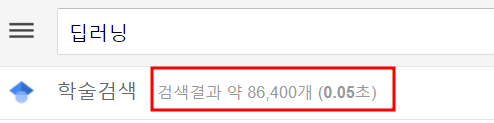

In [65]:
####################################3
## 미션, 구글 학술검색 사이트에서
## '딥러닝' 으로 검색한 검색결과가 몇건인지 출력
####################################
import requests
import requests
from bs4 import BeautifulSoup
url='https://scholar.google.co.kr/scholar?hl=ko&as_sdt=0%2C5&q=%EB%94%A5%EB%9F%AC%EB%8B%9D&btnG='




### [미션3] 
- 구글 논문 사이트에서 논문자료 링크 리스트 만들고, 내 컴퓨터로 다운받기

In [ ]:
# selenium의 webdriver를 사용하기 위한 import
from selenium import webdriver

# selenium으로 키를 조작하기 위한 import
from selenium.webdriver.common.keys import Keys

# 페이지 로딩을 기다리는데에 사용할 time 모듈 import
import time

# 크롬드라이버 실행
driver = webdriver.Chrome() 

#크롬 드라이버에 url 주소 넣고 실행
driver.get('https://www.google.co.kr/')

# 페이지가 완전히 로딩되도록 3초동안 기다림
time.sleep(3)
